In [ ]:
#PARTE I: FAMILIARIZANDNOS CON LA EPH Y LIMPIEZA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import numpy as np

EPH2025 = pd.read_excel(r"C:\Users\Isabella\Downloads\usu_individual_T125.xlsx")

EPH2005 = pd.read_stata(r"C:\Users\Isabella\Downloads\Individual_t105.dta")

print(EPH2025.head())
print(EPH2005.head())

#Vamos a ver por cada región cuántos datos hay para poder elegir

# 2025
conteo_2025 = EPH2025['REGION'].value_counts()
print("2025",conteo_2025)

# 2005
conteo_2005 = EPH2005['region'].value_counts()
print("2005",conteo_2005)

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           2    1   
1  TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           3    0   
2  TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           4    0   
3  TQRMNOVQVHJOLOCDEFKID00875778  2025          1          1           5    0   
4  TQRMNOUPQHLOLOCDEFKID00851757  2025          1          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  V21_03_M  V22_01_M V22_02_M  \
0      43       S           4      927  ...         0         0        0   
1      43       S           4      927  ...         0         0        0   
2      43       S           4      927  ...         0         0        0   
3      43       S           4      927  ...         0         0        0   
4      43       S           4     1294  ...         0         0        0   

   V22_03_M  P_DECCF  P_RDECCF  P_GDECCF  P_PDECCF  P_ID

In [ ]:
#2.A

In [2]:
# Como nombraron distinto a las regiones en los dos años, vemos como se llaman así filtramos bien
print(EPH2025['REGION'].unique())
#está como 43

# Lo mismo para 2005
print(EPH2005['region'].unique())
#está como Pampeana

#nos aseguramos que estén las dos en minúsculas para poder unir las bases
EPH2025.columns = EPH2025.columns.str.lower()
EPH2005.columns = EPH2005.columns.str.lower()

#nos quedamos solo con pampeana
# Filtrar Región Pampeana en 2005
EPH2005_pampeana = EPH2005[EPH2005['region'] == 'Pampeana'].copy()

# Filtrar Región Pampeana en 2025 (código 43)
EPH2025_pampeana = EPH2025[EPH2025['region'] == 43].copy()

# Agregar columna 'anio' para diferenciar
EPH2005_pampeana['anio'] = 2005
EPH2025_pampeana['anio'] = 2025

# Unimos pampeana de las dos años
EPH_total = pd.concat([EPH2005_pampeana, EPH2025_pampeana], ignore_index=True)

[43 41 42 40 44  1]
['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']


In [ ]:
# 2.B

In [3]:
#guardamos las variables con las que nos quedamos en esta lista
variables = [
   "codusu","region", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado",
    "cat_inac", "ipcf", "ch09", "cat_ocup",  
    "ch15", "itf",  "ch03", "p47t", "p21"
]

EPH2005_filtrado = EPH2005[variables]

EPH2025_filtrado = EPH2025[variables]

In [4]:
EPH2005_filtrado.head(5)

,codusu,region,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ch09,cat_ocup,ch15,itf,ch03,p47t,p21
0,125098,Gran Buenos Aires,Varón,80.0,Viudo,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,Jubilado/pensionado,583.0,Sí,0.0,En esta localidad,583.0,Jefe,583.0,0.0
1,125188,Gran Buenos Aires,Varón,26.0,Casado,No paga ni le descuentan,Secundaria Completa,Ocupado,0.0,150.0,Sí,Cuenta propia,En otra localidad,450.0,Jefe,450.0,300.0
2,125188,Gran Buenos Aires,Mujer,27.0,Casado,No paga ni le descuentan,Superior Universitaria Completa,Inactivo,Ama de casa,150.0,Sí,0.0,En esta localidad,450.0,Cónyuge/Pareja,0.0,0.0
3,125188,Gran Buenos Aires,Mujer,Menos de 1 año,Soltero,No paga ni le descuentan,Sin instrucción,Menor de 10 años,Menor de 6 años,150.0,Menor de 2 años,0.0,En esta localidad,450.0,Hijo/Hijastro,0.0,0.0
4,125242,Gran Buenos Aires,Mujer,71.0,Viudo,Obra social (incluye PAMI),Primaria Completa,Inactivo,Jubilado/pensionado,855.0,Sí,0.0,En esta localidad,855.0,Jefe,855.0,0.0


In [5]:
EPH2025_filtrado.head(5)

,codusu,region,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ch09,cat_ocup,ch15,itf,ch03,p47t,p21
0,TQRMNOVQVHJOLOCDEFKID00875778,43,2,25,1,4.0,4,1,0,205600.0,1,3,1,1028000,2,628000.0,200000
1,TQRMNOVQVHJOLOCDEFKID00875778,43,2,7,5,4.0,1,4,3,205600.0,1,0,1,1028000,3,0.0,0
2,TQRMNOVQVHJOLOCDEFKID00875778,43,1,4,5,4.0,7,4,5,205600.0,2,0,1,1028000,3,0.0,0
3,TQRMNOVQVHJOLOCDEFKID00875778,43,1,-1,5,4.0,7,4,5,205600.0,3,0,1,1028000,3,0.0,0
4,TQRMNOUPQHLOLOCDEFKID00851757,43,2,29,5,4.0,5,1,0,230000.0,1,2,1,690000,1,690000.0,400000


In [6]:
#vemos el tipo de datos que hay en cada año
print(EPH2005_filtrado.dtypes)
print(EPH2025_filtrado.dtypes)

#despues de esto vemos que mientras tenemos variables category en 2005, en 2025 están en int64 o float64, vamos a poner todo en un mismo formato

codusu        object
region      category
ch04        category
ch06        category
ch07        category
ch08        category
nivel_ed    category
estado      category
cat_inac    category
ipcf         float64
ch09        category
cat_ocup    category
ch15        category
itf          float64
ch03        category
p47t         float64
p21          float64
dtype: object
codusu       object
region        int64
ch04          int64
ch06          int64
ch07          int64
ch08        float64
nivel_ed      int64
estado        int64
cat_inac      int64
ipcf        float64
ch09          int64
cat_ocup      int64
ch15          int64
itf           int64
ch03          int64
p47t        float64
p21           int64
dtype: object


In [7]:
# ahora, para arreglar y que tengan el mismo formato en ambas bases de dato, nos fijamos con la función .unique() en cada
#variable para armar un diccionari para cada una variable y después cambiar su valor para que esten iguales
mapping_ch04 = {
    'Varón': 1,
    'Mujer': 2
}

mapping_ch07 = {
    'Unido': 1,
    'Casado': 2,
    'Separado o divorciado': 3,
    'Viudo': 4,
    'Soltero': 5,
    'Ns./Nr.': pd.NA
}
mapping_ch08 = {
    'Obra social (incluye PAMI)': 1,
    'Mutual/Prepaga/Servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Ns./Nr.': pd.NA,
    'Obra social y mutual/prepaga/servicio de emergencia': 12,
    'Obra social y planes y seguros públicos': 13,
    'Mutual/prepaga/servicio de emergencia/planes y seguros públicos': 23,
    'Obra social, mutual/prepaga/servicio de emergencia y Planes y Seguros Públicos': 123
}
mapping_nivel_ed = {
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns./Nr.': pd.NA
}
mapping_estado = {
    "Entrevista individual no realizada (no respuesta al cuestion": 0,
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    'Menor de 10 años': 4
}
mapping_cat_inac = {
    'Jubilado/pensionado': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Ama de casa': 4,
    'Menor de 6 años': 5,
    'Discapacitado': 6,
    'Otros': 7,
    0.0: 0
}
mapping_ch15 = {
    'En esta localidad': 1,
    'En otra localidad': 2,
    'En otra provincia (especificar)': 3,
    'En un país limítrofe': 4,
    'En otro país': 5,
    'Ns./Nr.': pd.NA
}
mapping_ch09 = {
    'Sí': 1,
    'No': 2,
    'Menor de 2 años': 3,
    'Ns./Nr.': pd.NA
}
mapping_ch03 = {
    'Jefe': 1,
    'Cónyuge/Pareja': 2,
    'Hijo/Hijastro': 3,
    'Yerno/Nuera': 4,
    'Nieto': 5,
    'Madre/Padre': 6,
    'Suegro': 7,
    'Hermano': 8,
    'Otros familiares': 9,
    'No familiares': 10
}
mapping_cat_ocup = {
    'Patrón': 1,
    'Cuenta propia': 2,
    'Obrero o empleado': 3,
    'Trabajador familiar sin remuneración': 4,
    0.0 : 0
}

def limpiar_edad(x):
    if isinstance(x, str):
        if 'Menos de 1' in x:
            return 0
        elif '98' in x:
            return 99
        else:
            return pd.NA
    else:
        return int(x)

EPH2005_filtrado.loc[:, 'ch04'] = EPH2005_filtrado['ch04'].map(mapping_ch04).astype('Int64')
EPH2005_filtrado.loc[:, 'ch06'] = EPH2005_filtrado['ch06'].apply(limpiar_edad).astype('Int64')
EPH2005_filtrado.loc[:, 'ch07'] = EPH2005_filtrado['ch07'].map(mapping_ch07).astype('Int64')
EPH2005_filtrado.loc[:, 'ch08'] = EPH2005_filtrado['ch08'].map(mapping_ch08).astype('Int64')
EPH2005_filtrado.loc[:, 'nivel_ed'] = EPH2005_filtrado['nivel_ed'].map(mapping_nivel_ed).astype('Int64')
EPH2005_filtrado.loc[:, 'estado'] = EPH2005_filtrado['estado'].map(mapping_estado).astype('Int64')
EPH2005_filtrado.loc[:, 'cat_inac'] = EPH2005_filtrado['cat_inac'].map(mapping_cat_inac).astype('Int64')
EPH2005_filtrado.loc[:, 'ch15'] = EPH2005_filtrado['ch15'].map(mapping_ch15).astype('Int64')
EPH2005_filtrado.loc[:, 'ch09'] = EPH2005_filtrado['ch09'].map(mapping_ch09).astype('Int64')
EPH2005_filtrado.loc[:, 'ch03'] = EPH2005_filtrado['ch03'].map(mapping_ch03).astype('Int64')
EPH2005_filtrado.loc[:, 'cat_ocup'] = EPH2005_filtrado['cat_ocup'].map(mapping_cat_ocup).astype('Int64')

#Decidimos no considerar los 9 como Nan. Los consideramos una respuesta más.

# Vemos cambios
print(EPH2005_filtrado.head(10))
print(EPH2005_filtrado.dtypes)

     codusu             region  ch04  ch06  ch07  ch08  nivel_ed  estado  \
0  125098    Gran Buenos Aires     1    80     4     1         3       3   
1  125188    Gran Buenos Aires     1    26     2     4         4       1   
2  125188    Gran Buenos Aires     2    27     2     4         6       3   
3  125188    Gran Buenos Aires     2     0     5     4         7       4   
4  125242    Gran Buenos Aires     2    71     4     1         2       3   
5  125436    Gran Buenos Aires     1    54     2     1         4       1   
6  125436    Gran Buenos Aires     2    54     2     1         4       3   
7  125436    Gran Buenos Aires     2    27     5     1         4       3   
8  125436    Gran Buenos Aires     1    20     5     1         3       2   
9  125436    Gran Buenos Aires     2    18     5     1         5       3   

   cat_inac    ipcf  ch09  cat_ocup  ch15     itf  ch03    p47t     p21  
0         1   583.0     1         0     1   583.0     1   583.0     0.0  
1         0   1

C:\Users\Isabella\AppData\Local\Temp\ipykernel_17608\193013523.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[1, 1, 2, 2, 2, 1, 2, 2, 1, 2,
 ...
 1, 2, 1, 1, 2, 2, 1, 1, 2, 2]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'ch04'] = EPH2005_filtrado['ch04'].map(mapping_ch04).astype('Int64')
C:\Users\Isabella\AppData\Local\Temp\ipykernel_17608\193013523.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[80, 26, 27,  0, 71, 54, 54, 27, 20, 18,
 ...
  8,  5,  3, 41, 44, 16, 12, 43, 26,  5]
Length: 47030, dtype: Int64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  EPH2005_filtrado.loc[:, 'ch06'] = EPH2005_filtrado['ch06'].apply(limpiar_edad).astype('Int64')
C:\Users

In [8]:
# Columnas categóricas que ya son números significativos
categ_numericas = ["ch04","ch03","ch06","ch07","ch08","ch09","ch15",
                   "nivel_ed","estado","cat_inac","cat_ocup"]

# Columnas float
float_cols = ["ipcf","itf","p47t","p21"]

# Convertimos categóricas a Int64
for col in categ_numericas:
    if col in EPH2005_filtrado.columns:
        EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype('Int64')
    if col in EPH2025_filtrado.columns:
        EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype('Int64')

# Convertimos tambie´n a los floats
for col in float_cols:
    if col in EPH2005_filtrado.columns:
        EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype(float)
    if col in EPH2025_filtrado.columns:
        EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype(float)

# Revisamos tipos
print("EPH2005 (Región Pampeana):")
print(EPH2005_filtrado.dtypes)
print("\nEPH2025 (Región Pampeana):")
print(EPH2025_filtrado.dtypes)

#Ahora vemos que quedaron iguales en tipos de datos, menos región que vamos a 
#quedarnos solo con región pampeana antes de unir las bases

EPH2005 (Región Pampeana):
codusu        object
region      category
ch04           Int64
ch06           Int64
ch07           Int64
ch08           Int64
nivel_ed       Int64
estado         Int64
cat_inac       Int64
ipcf         float64
ch09           Int64
cat_ocup       Int64
ch15           Int64
itf          float64
ch03           Int64
p47t         float64
p21          float64
dtype: object

EPH2025 (Región Pampeana):
codusu       object
region        int64
ch04          Int64
ch06          Int64
ch07          Int64
ch08          Int64
nivel_ed      Int64
estado        Int64
cat_inac      Int64
ipcf        float64
ch09          Int64
cat_ocup      Int64
ch15          Int64
itf         float64
ch03          Int64
p47t        float64
p21         float64
dtype: object


C:\Users\Isabella\AppData\Local\Temp\ipykernel_17608\1909328840.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2005_filtrado[col] = pd.to_numeric(EPH2005_filtrado[col], errors='coerce').astype('Int64')
C:\Users\Isabella\AppData\Local\Temp\ipykernel_17608\1909328840.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2025_filtrado[col] = pd.to_numeric(EPH2025_filtrado[col], errors='coerce').astype('Int64')
C:\Users\Isabella\AppData\Local\Temp\ipykernel_17608\1909328840.py:18: SettingWithCopyWarn

In [ ]:
#HACEMOS HEATMAP

#ponemos los missing values en una variable que se llama missing
missing = EPH_total.groupby("anio")[variables].apply(lambda x: x.isna().sum())

#Ponemos las etiquetas para que el gráfico se vea mejor y se entienda
diccionario_etiquetas_heatmap = {
    'ch04': 'Sexo',
    'ch06': 'Edad',
    'ch07': 'Estado Civil',
    'ch08': 'Cobertura Médica',
    'nivel_ed': 'Nivel Educativo',
    'estado': 'Condición de Actividad',
    'cat_inac': 'Categoría de Inactivo',
    'ipcf': 'Ingreso P.C. Familiar',
    'ch09': 'Sabe leer y escribir',
    'cat_ocup': 'Categoría Ocupacional',
    'ch15': 'Lugar de Nacimiento',
    'itf': 'Ingreso Total Familiar',
    'ch03': 'Parentesco',
    'p47t': 'Ingreso Ocup. Principal',
    'p21': 'Ingreso Total Individual'
}

#renombramos con missing y el diccionario
missing_etiquetado = missing.T.rename(index=diccionario_etiquetas_heatmap)


# gráfico final:
plt.figure(figsize=(12, 8)) # Aumenté un poco el alto para que las etiquetas se vean bien
sns.heatmap(
    missing_etiquetado,
    annot=True,
    fmt="d",
    cmap="Reds",
    cbar_kws={'label': 'Cantidad de NAs'}
)

plt.title("Valores Faltantes por Año y Variable", fontsize=16)
plt.ylabel("Variable", fontsize=12)
plt.xlabel("Año", fontsize=12) # Mantiene las etiquetas del eje Y horizontales
plt.show()

In [ ]:
#2.C

In [9]:
# Antes de unir las bases, vamos a chequear valores negativos 

# Definimos la lista exacta de variables que quieres revisar.
variables_a_revisar = ['ipcf', 'ch15', 'itf', 'p47t', 'p21']

print("--- Conteo de valores negativos en EPH 2005 ---")
# Filtramos el DataFrame para quedarnos solo con las filas donde cualquier
# valor en las columnas especificadas es negativo, y luego contamos.
negativos_2005 = EPH2005_filtrado[variables_a_revisar][EPH2005_filtrado[variables_a_revisar] < 0].count()
print(negativos_2005)


print("\n--- Conteo de valores negativos en EPH 2025 ---")
# Repetimos el mismo proceso para la base de datos de 2025.
negativos_2025 = EPH2025_filtrado[variables_a_revisar][EPH2025_filtrado[variables_a_revisar] < 0].count()
print(negativos_2025)


--- Conteo de valores negativos en EPH 2005 ---
ipcf    0
ch15    0
itf     0
p47t    0
p21     0
dtype: int64

--- Conteo de valores negativos en EPH 2025 ---
ipcf       0
ch15       0
itf        0
p47t    5405
p21     3839
dtype: int64


In [22]:
variables = [
    "codusu", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado",
    "cat_inac", "ipcf", "ch09", "cat_ocup",
    "ch15", "itf", "ch03", "p47t", "p21"
]

# Para 2005: solo filtramos por región Pampeana y seleccionamos las variables.
# No se limpian negativos porque, como se ve en el codigo anterior, para el año 2005, no hay.
EPH2005_pampeana = EPH2005_filtrado.loc[
    EPH2005_filtrado['region'] == "Pampeana",
    variables
].copy()

# Para 2025: aplicamos TODOS los filtros a la vez usando el operador '&' (y).
# Condición 1: La región debe ser 43 (Pampeana).
# Condición 2: El ingreso p47t debe ser mayor o igual a 0.
# Condición 3: El ingreso p21 debe ser mayor o igual a 0.
EPH2025_pampeana = EPH2025_filtrado.loc[
    (EPH2025_filtrado['region'] == 43) &     
    (EPH2025_filtrado['p47t'] >= 0) &   
    (EPH2025_filtrado['p21'] >= 0),           
    variables
].copy()

# Ahora sí, agregamos año y unimos
EPH2005_pampeana['anio'] = 2005
EPH2025_pampeana['anio'] = 2025

EPH_total = pd.concat([EPH2005_pampeana, EPH2025_pampeana], ignore_index=True)

In [24]:
EPH_total.head(5)

,codusu,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,ch09,cat_ocup,ch15,itf,ch03,p47t,p21,anio
0,125082,1,28,2,4,2,1,0,280.0,1,3,1,840.0,1,500.0,500.0,2005
1,125082,2,30,2,1,6,1,0,280.0,1,3,1,840.0,2,340.0,340.0,2005
2,125082,1,4,5,1,7,4,5,280.0,2,0,1,840.0,3,0.0,0.0,2005
3,125283,1,66,2,2,3,1,0,1075.0,1,3,1,4300.0,1,1500.0,600.0,2005
4,125283,2,60,2,2,3,1,0,1075.0,1,3,1,4300.0,2,1900.0,1400.0,2005


In [ ]:
#PARTE II: PRIMER ANÁLISIS EXPLORATORIO

In [ ]:
#EJERCICIO 3

Totales por sexo y año en Región Pampeana:
   anio  ch04  count
0  2005     1   6956
1  2005     2   7695
2  2025     1   5488
3  2025     2   6210


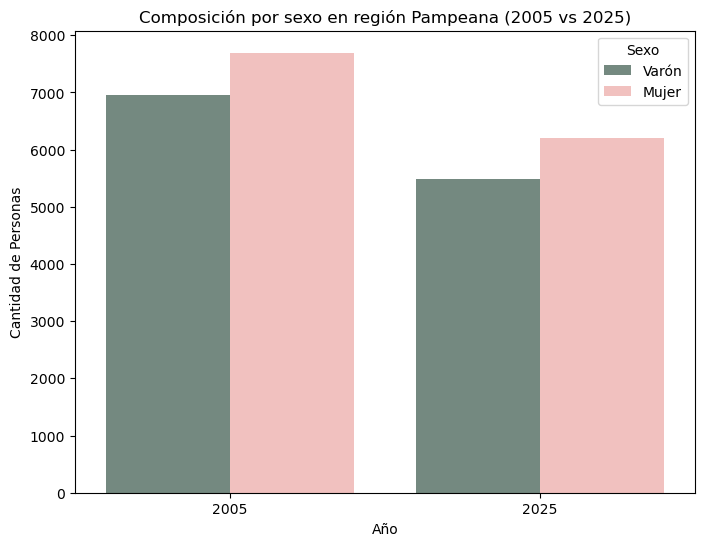

In [14]:
#calculamos la cantidad por sexo por año con .groupby()
total_sexo_anio = EPH_total.groupby(['anio', 'ch04']).size().reset_index(name='count')
print("Totales por sexo y año en Región Pampeana:")
print(total_sexo_anio)

# ahora ponemos este dataframe con este cuenteo que hicimos antes
sexo_counts = total_sexo_anio.copy()
sexo_counts['ch04'] = sexo_counts['ch04'].map({1: 'Varón', 2: 'Mujer'})
colores = {'Varón': '#708D81', 'Mujer': "#F9B9B7"}

# gráfico:
plt.figure(figsize=(8,6))

sns.barplot(
    data=sexo_counts,
    x='anio',
    y='count', # Usamos la columna de conteo para el eje Y
    hue='ch04',
    palette=colores
)

plt.title("Composición por sexo en región Pampeana (2005 vs 2025)")
plt.ylabel("Cantidad de Personas") # Etiqueta del eje Y actualizada
plt.xlabel("Año")
plt.legend(title="Sexo")

plt.show()

In [ ]:
#EJERCICIO 4

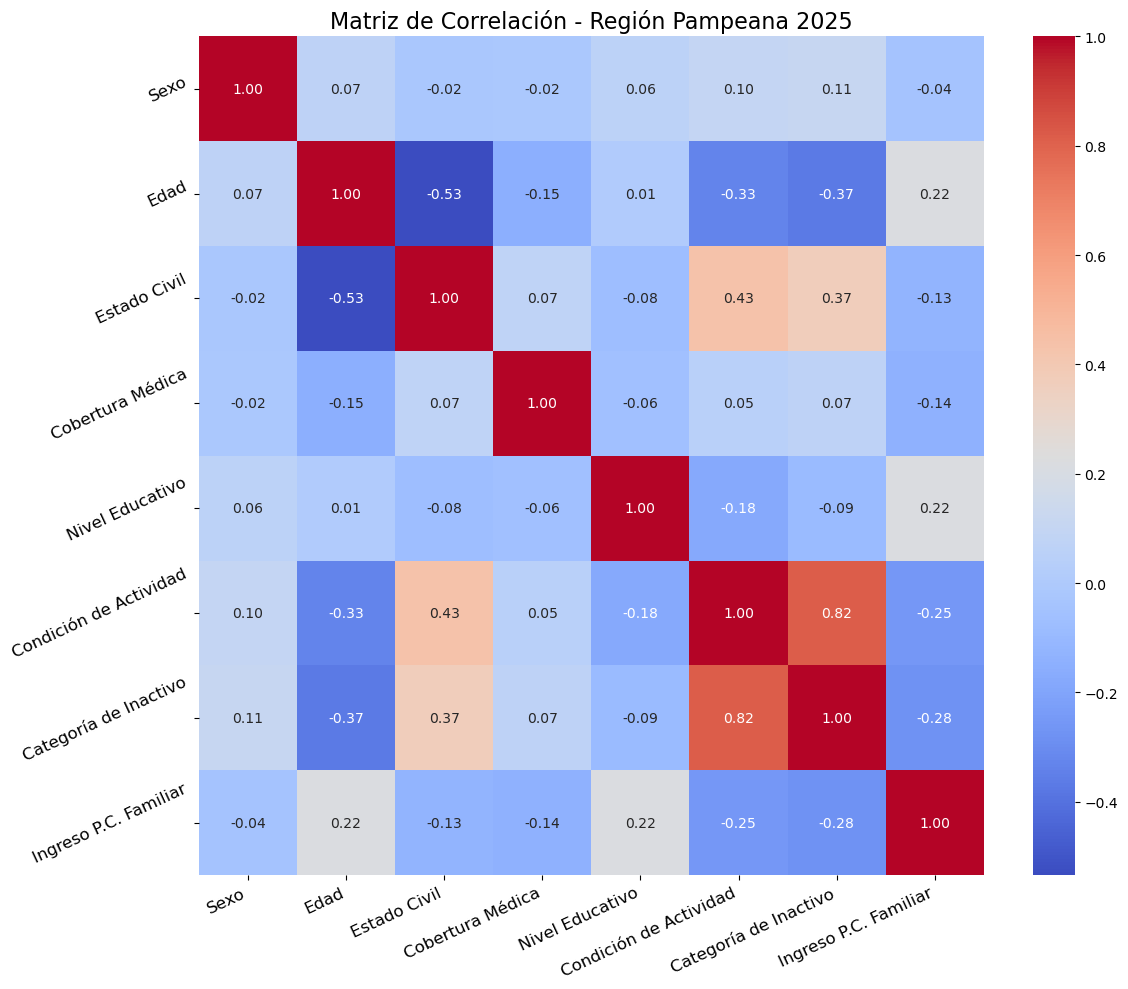

In [15]:
#elegimos qué variables queremos gráficar
variables_corr = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# creamos dataframe para 2025 de esas variables
df_para_corr = EPH2025_pampeana[variables_corr].copy()
#calculamos matriz
corr_2025 = df_para_corr.corr()

#hacemos lo mismo que en el heatmap porque sino quedarían las etiquetas ch04 o ch06 y es complicado de leer así
diccionario_etiquetas = {
    'ch04': 'Sexo',
    'ch06': 'Edad',
    'ch07': 'Estado Civil',
    'ch08': 'Cobertura Médica',
    'nivel_ed': 'Nivel Educativo',
    'estado': 'Condición de Actividad',
    'cat_inac': 'Categoría de Inactivo',
    'ipcf': 'Ingreso P.C. Familiar'
}

# renombramos las filas y creamos la matriz
corr_2025_etiquetada = corr_2025.rename(
    columns=diccionario_etiquetas,
    index=diccionario_etiquetas
)

# gráfico
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_2025_etiquetada,
    cmap='coolwarm', # Usas un mapa de color divergente, ideal para correlaciones
    annot=True,     # Muestra los valores numéricos en las celdas
    fmt=".2f"       # Formatea los números a 2 decimales
)
plt.xticks(rotation=25, ha='right', fontsize = 12)
plt.yticks(rotation=25, fontsize = 12)
plt.title("Matriz de Correlación - Región Pampeana 2025", fontsize=16)
plt.tight_layout() # Ajusta el gráfico para que no se corten las etiquetas
plt.show()

In [25]:
EPH2025_pampeana["estado"].unique()

<IntegerArray>
[1, 4, 3, 2]
Length: 4, dtype: Int64

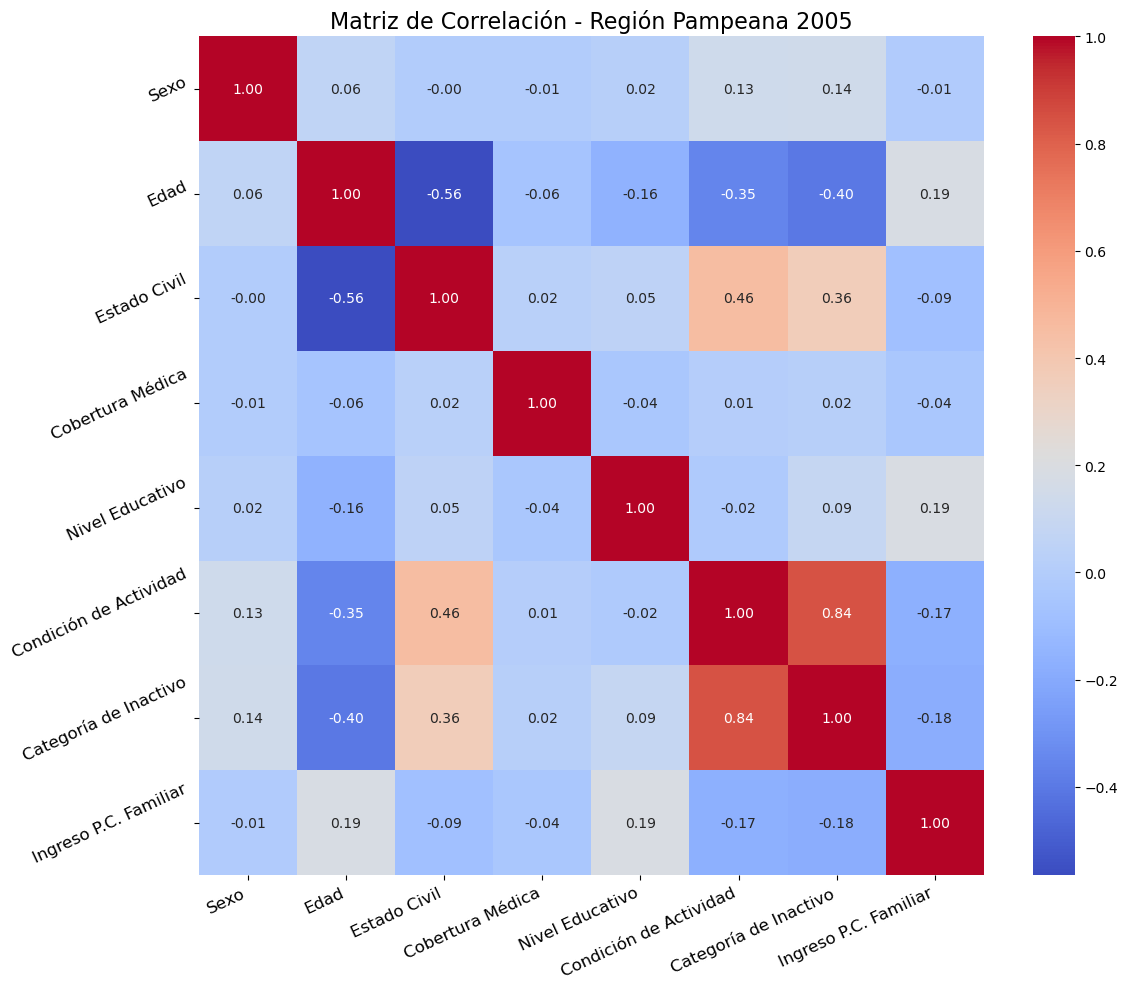

In [16]:
#definimos variables
variables_corr_2005 = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
#hacemos dataframe 2005 con estas variables
df_para_corr_2005 = EPH2005_pampeana[variables_corr_2005].copy()

# --- 3. Calcular la matriz de correlación ---
# Se calcula la correlación directamente, tratando las variables codificadas como números
corr_2005 = df_para_corr_2005.corr()

# mismo procedimiento, creamos etiquetas para leer mejor el gráfico
diccionario_etiquetas = {
    'ch04': 'Sexo',
    'ch06': 'Edad',
    'ch07': 'Estado Civil',
    'ch08': 'Cobertura Médica',
    'nivel_ed': 'Nivel Educativo',
    'estado': 'Condición de Actividad',
    'cat_inac': 'Categoría de Inactivo',
    'ipcf': 'Ingreso P.C. Familiar'
}

#renombramos y creamos la matriz
corr_2005_etiquetada = corr_2005.rename(
    columns=diccionario_etiquetas,
    index=diccionario_etiquetas
)

# gráfico
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_2005_etiquetada,
    cmap='coolwarm',
    annot=True,
    fmt=".2f"
)
plt.xticks(rotation=25, ha='right', fontsize = 12)
plt.yticks(rotation=25, fontsize = 12)
plt.title("Matriz de Correlación - Región Pampeana 2005", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#PARTE III: CONOCINDO A LOS POBRES Y NO POBRES

In [ ]:
#EJERCICIO 5

In [17]:
# Contar cuántas personas respondieron estado respondieron == 0 por año
respondieron_estado0 = EPH_total[EPH_total["estado"] == 0].groupby("anio").size()

print("Cantidad de personas que no respondieron su condición de actividad por año:")
print(respondieron_estado0)

Cantidad de personas que no respondieron su condición de actividad por año:
anio
2005    24
dtype: int64


In [29]:
# Aca lo que pasó fue que nos dimos cuenta que no aparecían los estado == 0 del 2025. Nos fijamos en donde exactamente habíamos perdido esos datos
conteo_inicial_2025 = (EPH2025_filtrado['estado'] == 0).sum()

#efectivamentem antes de unir las bases de datos habían 75 personas con estado == 0
print(f"En el DataFrame 'EPH2025_filtrado' original, hay {conteo_inicial_2025} filas con estado == 0.")

En el DataFrame 'EPH2025_filtrado' original, hay 75 filas con estado == 0.


In [30]:
# Para verificar, creamos un data frame con estas variables
df_estado0_2025 = EPH2025_filtrado[EPH2025_filtrado['estado'] == 0]

# De esas 75, ¿cuántas son pampeanas?
filas_region_ok = (df_estado0_2025['region'] == 43).sum()
#11 eran pampeanas

# Prueba 2: ¿Cuántas de estas 75 filas tienen un ingreso p47t >= 0?
filas_p47t_ok = (df_estado0_2025['p47t'] >= 0).sum()
#NINGUNA tenía el p47t (monto total de ingreso individual percibido en el mes de referencia) <= 0
#entonces cuando quitamos estos sujetos, los perdimos de nuestra pase de datos, pero eran 11 en definitiva

# Prueba 3: ¿Cuántas de estas 75 filas tienen un ingreso p21 >= 0?
filas_p21_ok = (df_estado0_2025['p21'] >= 0).sum()
#Todas tenían p21 (monto de ingreso de la ocupación principal)>= 0

Análisis sobre las 75 filas con estado == 0:
--------------------------------------------------
De las 75 filas, 11 pertenecen a la región 43.
De las 75 filas, 0 tienen un p47t >= 0.
De las 75 filas, 75 tienen un p21 >= 0.


In [31]:
# Vemos itf > 0
respondieron = EPH_total[EPH_total['itf'] > 0].copy()
# Vemos itf = 0 (es decir, no respondieron)
norespondieron = EPH_total[EPH_total['itf'] == 0].copy()
print("Número de observaciones que respondieron ITF:", respondieron.shape[0])
print("Número de observaciones que no respondieron ITF:", norespondieron.shape[0])

Número de observaciones que respondieron ITF: 23821
Número de observaciones que no respondieron ITF: 2528


In [32]:
# Separar respondieron por año
respondieron_2005 = respondieron[respondieron['anio'] == 2005].copy()
respondieron_2025 = respondieron[respondieron['anio'] == 2025].copy()

# Separar norespondieron por año
norespondieron_2005 = norespondieron[norespondieron['anio'] == 2005].copy()
norespondieron_2025 = norespondieron[norespondieron['anio'] == 2025].copy()

# Revisar dimensiones
print("Respondieron 2005:", respondieron_2005.shape)
print("Respondieron 2025:", respondieron_2025.shape)
print("No respondieron 2005:", norespondieron_2005.shape)
print("No respondieron 2025:", norespondieron_2025.shape)

Respondieron 2005: (14481, 17)
Respondieron 2025: (9340, 17)
No respondieron 2005: (170, 17)
No respondieron 2025: (2358, 17)


In [57]:
#EJERCICIO 6

In [34]:
# Cargamos la tabla, si no la encuentra nos dice que no se encontró (el try/except)
try:
    df_equiv = pd.read_excel(r"C:\Users\Isabella\Downloads\tabla_adulto_equiv.xlsx", skiprows=4, nrows=23)
except FileNotFoundError:
    print("Error: El archivo 'tabla_adulto_equiv.xlsx' no se encontró. Revisa la ruta.")
    # Si usas Jupyter o Google Colab, es mejor salir de la celda si hay error.
    # Si es un script, podrías usar exit()
    raise

# Limpiamos y preparamos la tabla con las columnas que nos piden. Nos fijemos que todo tenga el formato correcto
df_equiv.columns = ['edad_str', 'Mujeres', 'Varones']
df_equiv_long = pd.melt(df_equiv, id_vars='edad_str', value_vars=['Mujeres', 'Varones'],
                        var_name='sexo_str', value_name='adulto_equiv')
df_equiv_long['ch04'] = df_equiv_long['sexo_str'].map({'Varones': 1, 'Mujeres': 2}).astype(int)
df_equiv_long['ch06'] = df_equiv_long['edad_str'].str.extract('(\d+)').astype(int)
df_equiv_long.loc[df_equiv_long['edad_str'] == 'Menor de 1 año', 'ch06'] = 0
df_equiv_final = df_equiv_long[['ch04', 'ch06', 'adulto_equiv']].dropna().sort_values(by=['ch04', 'ch06'])


# Preparamos el data frame respondieorn
# Creamos la base con ITF > 0 a partir de tu EPH_total
# Esto filtra los hogares que no informaron ingresos.
respondieron = EPH_total[EPH_total['itf'] > 0].copy()

# Nos aseguramos de que no haya nulos en las columnas clave para el cálculo y de que tengan el tipo de dato correcto.
columnas_clave = ['codusu', 'ch06', 'ch04', 'itf']
respondieron = respondieron.dropna(subset=columnas_clave)
respondieron['ch06'] = respondieron['ch06'].astype(int)
respondieron['ch04'] = respondieron['ch04'].astype(int)


# asignamos el adult equivs a cada persona
# Función de búsqueda que encuentra el valor de adulto equivalente
# para cada persona según su sexo y rango de edad.
def obtener_adulto_equiv(fila, tabla_equivalencias):
    sexo_persona = fila['ch04']
    edad_persona = fila['ch06']
    
    # Filtramos la tabla de equivalencias por el sexo de la persona
    tabla_sexo = tabla_equivalencias[tabla_equivalencias['ch04'] == sexo_persona]
    
    # Encuentra la fila correspondiente al rango de edad
    # Se toma el último valor de edad que sea menor o igual a la edad de la persona
    fila_equivalencia = tabla_sexo[tabla_sexo['ch06'] <= edad_persona]
    
    if not fila_equivalencia.empty:
        return fila_equivalencia['adulto_equiv'].iloc[-1]
    else:
        # Si no lo encuentra (por ej. edad negativa), devuelve NaN
        return np.nan

# Aplicamos la función a cada fila del DataFrame
respondieron['adulto_equiv'] = respondieron.apply(
    obtener_adulto_equiv, 
    axis=1, 
    tabla_equivalencias=df_equiv_final
)
# Agrupamos hogar y ad_equiv
# Usamos groupby con 'anio' y 'codusu' para identificar  cada hogar.
# '.transform('sum')' calcula la suma de 'adulto_equiv' para cada grupo (hogar)
# y luego asigna ese mismo valor total a cada miembro del hogar.

print("\nAgrupando por hogar y calculando 'ad_equiv_hogar'...")
respondieron['ad_equiv_hogar'] = respondieron.groupby(['anio', 'codusu'])['adulto_equiv'].transform('sum')
print("¡Cálculo de 'ad_equiv_hogar' completado!")


#  Vemos los primeros 10 de la tabla, seleccionando columnas relevantes.
# Deberías ver que las personas con el mismo 'codusu' y 'anio' tienen el mismo valor en 'ad_equiv_hogar'.
print(respondieron[['anio', 'codusu', 'ch04', 'ch06', 'adulto_equiv', 'ad_equiv_hogar']].head(10))

Asignando 'adulto_equiv' a cada persona...
¡Asignación completada!

Agrupando por hogar y calculando 'ad_equiv_hogar'...
¡Cálculo de 'ad_equiv_hogar' completado!

--- Verificación de los resultados (primeras 10 filas) ---
   anio    codusu  ch04  ch06  adulto_equiv  ad_equiv_hogar
0  2005  125082       1    28          1.02            2.34
1  2005  125082       2    30          0.77            2.34
2  2005  125082       1     4          0.55            2.34
3  2005  125283       1    66          0.83            3.63
4  2005  125283       2    60          0.76            3.63
5  2005  125283       1    29          1.02            3.63
6  2005  125283       1    26          1.02            3.63
7  2005  125409       1    33          1.00            2.13
8  2005  125409       2    25          0.76            2.13
9  2005  125409       2     1          0.37            2.13


In [ ]:
#EJERCICIO 7

In [35]:
# Definimos valores de la CBT
# Guardamos los valores de la canasta en variables para que el código sea más claro.
cbt_2005 = 205.07
cbt_2025 = 365177

# Creamos columna ingreso necesario
# Usamos np.where para aplicar un cálculo condicional basado en el año.
print("Calculando el ingreso necesario para cada hogar...")

respondieron['ingreso_necesario'] = np.where(
    respondieron['anio'] == 2005,                          
    respondieron['ad_equiv_hogar'] * cbt_2005,               
    respondieron['ad_equiv_hogar'] * cbt_2025                 
)

# Ejemplo para el año 2005
print(respondieron[respondieron['anio'] == 2005][['anio', 'ad_equiv_hogar', 'ingreso_necesario']].head())

# Ejemplo para el año 2025
print(respondieron[respondieron['anio'] == 2025][['anio', 'ad_equiv_hogar', 'ingreso_necesario']].head())

Calculando el ingreso necesario para cada hogar...
¡Cálculo de 'ingreso_necesario' finalizado!

--- Verificación de los resultados ---

Ejemplo para el año 2005:
   anio  ad_equiv_hogar  ingreso_necesario
0  2005            2.34           479.8638
1  2005            2.34           479.8638
2  2005            2.34           479.8638
3  2005            3.63           744.4041
4  2005            3.63           744.4041

Ejemplo para el año 2025:
       anio  ad_equiv_hogar  ingreso_necesario
14651  2025            2.99         1091879.23
14652  2025            2.99         1091879.23
14653  2025            2.99         1091879.23
14654  2025            2.99         1091879.23
14655  2025            2.12          774175.24


In [ ]:
#EJERCICIO 8

In [36]:
#Creamos columna pobe
# Al igual que en el inciso anterior usamos np.wherepara crear una columna basandonos en una condición 
# Condición: si el ingreso del hogar ('itf') es menor que su 'ingreso_necesario'.
# Valor si es verdadero: 1 (es pobre)
# Valor si es falso: 0 (no es pobre)

print("Creando la columna 'pobre'...")
respondieron['pobre'] = np.where(
    respondieron['itf'] < respondieron['ingreso_necesario'], 
    1, 
    0
)
print("¡Columna 'pobre' creada!")


# Calculamos cantidad y porcentaje de pobres
# Agrupamos el DataFrame por la columna 'anio'.
# Usamos .agg() para realizar múltiples cálculos a la vez sobre la columna "pobre":
#   - '"sum"nos da el total de pobres (porque suma todos los 1s).
#   - "count" nos da el total de personas en la muestra para ese año.

analisis_pobreza = respondieron.groupby('anio')['pobre'].agg(
    Cantidad_Pobres='sum', 
    Total_Personas='count'
)

# Calculamos el porcentaje dividiendo la cantidad de pobres por el total y multiplicando por 100
analisis_pobreza['Porcentaje_Pobreza'] = (analisis_pobreza['Cantidad_Pobres'] / analisis_pobreza['Total_Personas']) * 100


# Resultados
print(analisis_pobreza)
print(" Verificación de la columna 'pobre' (primeras 10 filas)")
print(respondieron[['anio', 'itf', 'ingreso_necesario', 'pobre']].head(10))

Creando la columna 'pobre'...
¡Columna 'pobre' creada!

--- Resultados de Pobreza (Cantidad y Porcentaje) ---
      Cantidad_Pobres  Total_Personas  Porcentaje_Pobreza
anio                                                     
2005             4264           14481           29.445480
2025             3256            9340           34.860814

--- Verificación de la columna 'pobre' (primeras 10 filas) ---
   anio     itf  ingreso_necesario  pobre
0  2005   840.0           479.8638      0
1  2005   840.0           479.8638      0
2  2005   840.0           479.8638      0
3  2005  4300.0           744.4041      0
4  2005  4300.0           744.4041      0
5  2005  4300.0           744.4041      0
6  2005  4300.0           744.4041      0
7  2005  1200.0           436.7991      0
8  2005  1200.0           436.7991      0
9  2005  1200.0           436.7991      0


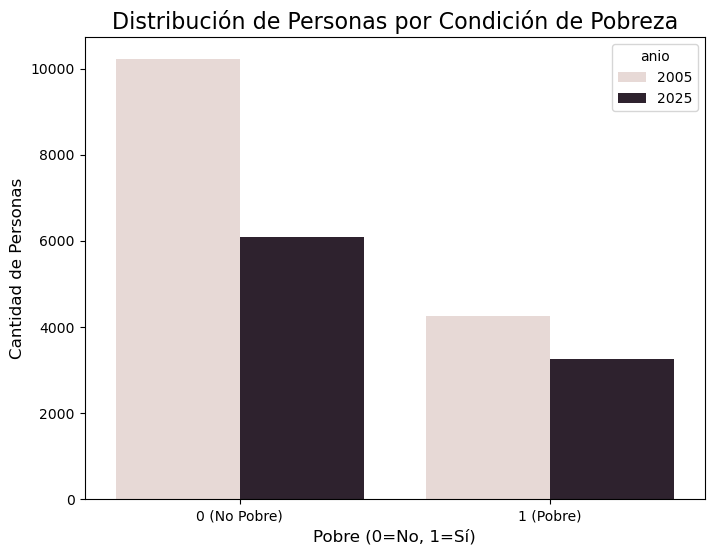

In [37]:
# Tabla de conteo para gráfico 
plot_data = respondieron.groupby(['anio', 'pobre']).size().reset_index(name='Cantidad de Personas')

# Aca solo estamos poniendo colores específicos que nos gustaron para el gráfico
colores_personalizados = {
    2005: '#EAD7D3', 
    2025: '#302030'  
}

# Gráfico:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=plot_data,
    x='pobre',
    y='Cantidad de Personas',
    hue='anio',
    palette=colores_personalizados
)

plt.title("Distribución de Personas por Condición de Pobreza", fontsize=16)
plt.xlabel("Pobre (0=No, 1=Sí)", fontsize=12)
plt.ylabel("Cantidad de Personas", fontsize=12)
plt.xticks([0, 1], ['0 (No Pobre)', '1 (Pobre)']) # Etiquetas más claras

plt.show()

In [ ]:
#EJERCICIO 9

In [38]:
# Columna con etiquetas 
# Mapeamos los valores 0 y 1 a 'No Pobre' y 'Pobre'
respondieron['Condicion'] = respondieron['pobre'].map({0: 'No Pobre', 1: 'Pobre'})

# Vemos algunas estadísticas relevantes
# Agrupamos por año y por la nueva columna "condición" y contamos cuántas personas hay en cada grupo
stats_pobreza = respondieron.groupby(['anio', 'Condicion']).size().reset_index(name='Cantidad')

# Calculamos el total de personas por año para ver los porcentajes
total_por_anio = respondieron.groupby('anio').size().reset_index(name='Total_Anio')

# Unimos las dos tablas 
stats_pobreza = pd.merge(stats_pobreza, total_por_anio, on='anio')

# calculamos el porcentaje
stats_pobreza['Porcentaje'] = (stats_pobreza['Cantidad'] / stats_pobreza['Total_Anio']) * 100

#Vemos la tabla ahora
print(stats_pobreza[['anio', 'Condicion', 'Cantidad', 'Total_Anio', 'Porcentaje']])

--- Estadísticas Descriptivas de Pobreza (Región Pampeana) ---
   anio Condicion  Cantidad  Total_Anio  Porcentaje
0  2005  No Pobre     10217       14481   70.554520
1  2005     Pobre      4264       14481   29.445480
2  2025  No Pobre      6084        9340   65.139186
3  2025     Pobre      3256        9340   34.860814


C:\Users\Isabella\AppData\Local\Temp\ipykernel_17608\2980092001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


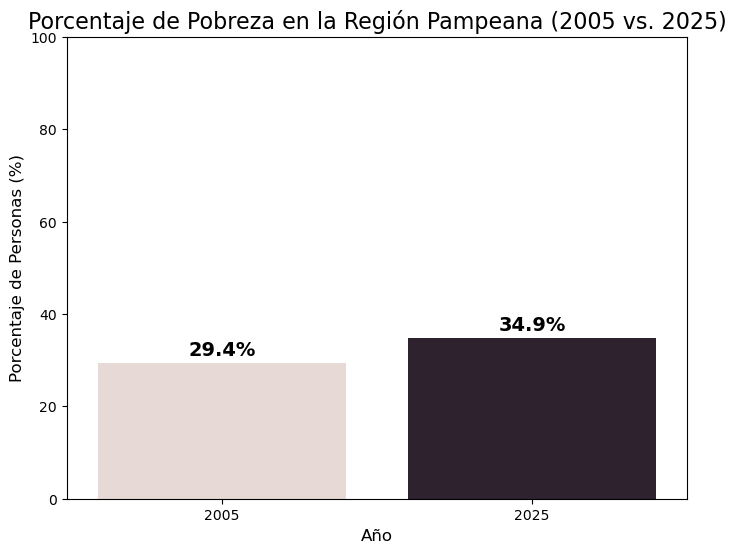

In [39]:
# Usamos la tabla de estadísticas que acabamos de crear, filtrando solo los pobres
pobreza_porcentajes = stats_pobreza[stats_pobreza['Condicion'] == 'Pobre']

plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    data=pobreza_porcentajes, 
    x='anio', 
    y='Porcentaje', 
    palette=['#EAD7D3', '#302030'] # Usando tus colores
)

# Agregamos los porcentajes encima de las barras para mayor claridad
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=14,
                     fontweight='bold')

plt.title('Porcentaje de Pobreza en la Región Pampeana (2005 vs. 2025)', fontsize=16)
plt.ylabel('Porcentaje de Personas (%)', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.ylim(0, 100)
plt.show()

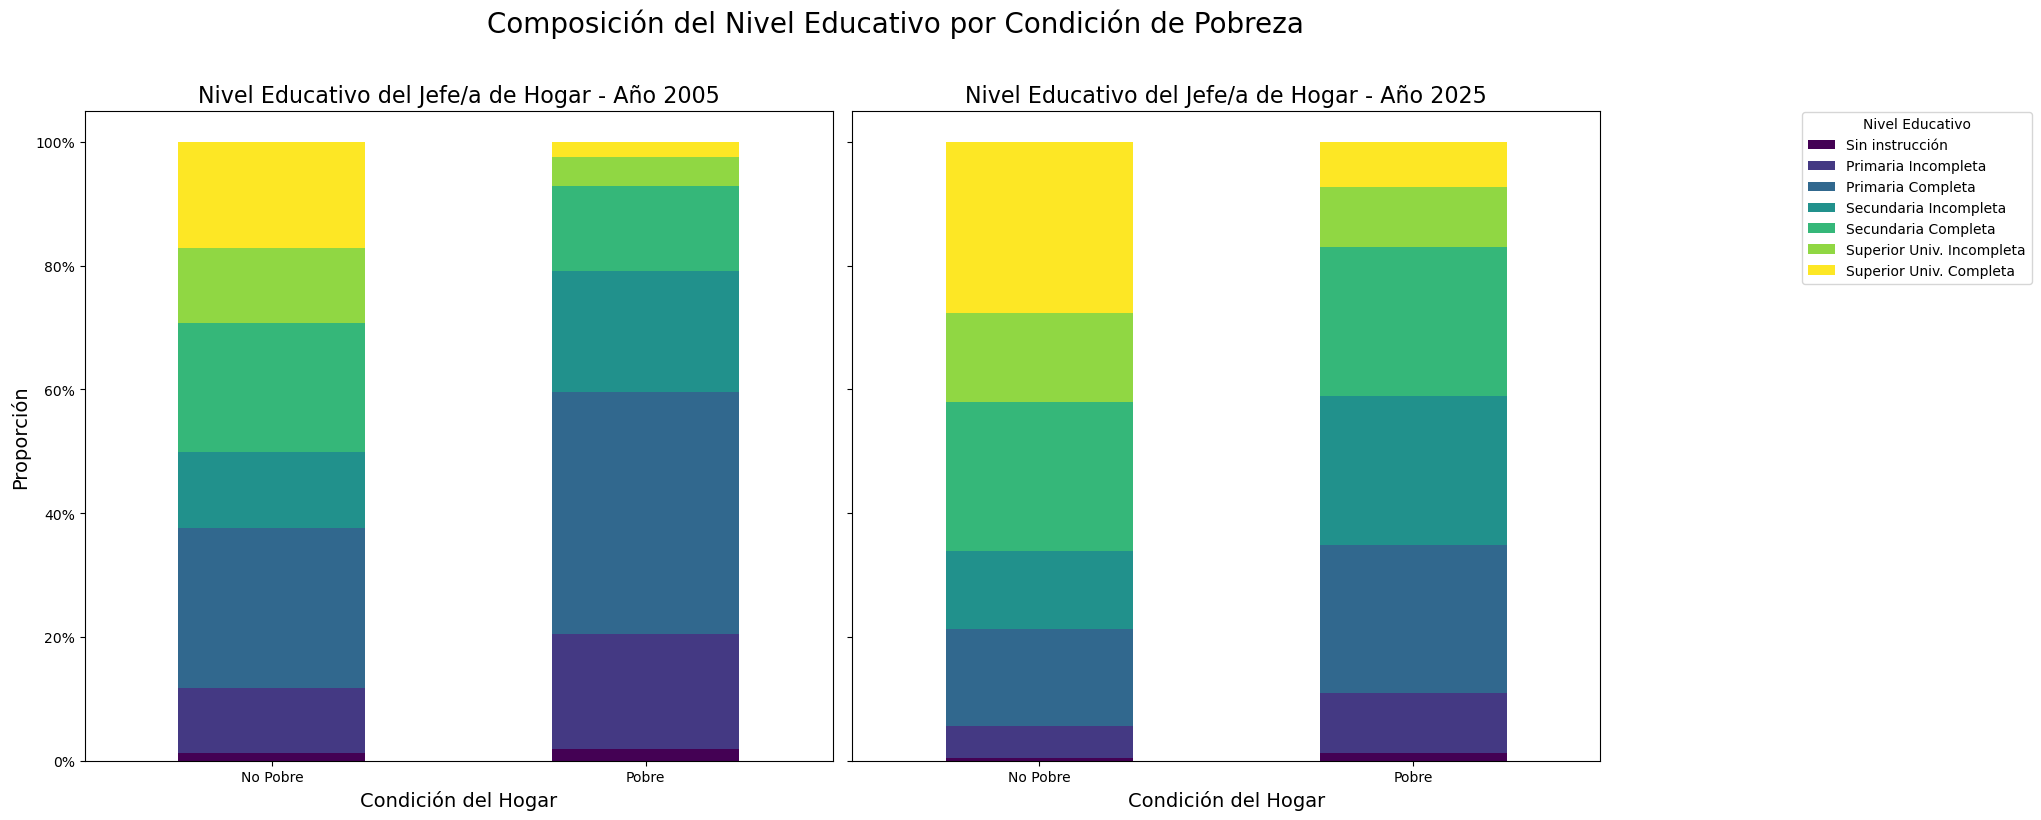

In [40]:
# Mapeo del nivel educativo a etiquetas descriptivas
mapa_nivel_ed = {
    1: 'Primaria Incompleta', 2: 'Primaria Completa',
    3: 'Secundaria Incompleta', 4: 'Secundaria Completa',
    5: 'Superior Univ. Incompleta', 6: 'Superior Univ. Completa',
    7: 'Sin instrucción'
}

# Filtramos solo por los jefes/as de hogar
df_jefes = respondieron[respondieron['ch03'] == 1].copy()
df_jefes['nivel_ed_str'] = df_jefes['nivel_ed'].map(mapa_nivel_ed)

# Calculamos las proporciones para cada año, rellenando nulos con 0
props_2005 = df_jefes[df_jefes['anio'] == 2005].groupby('Condicion')['nivel_ed_str'].value_counts(normalize=True).unstack().fillna(0)
props_2025 = df_jefes[df_jefes['anio'] == 2025].groupby('Condicion')['nivel_ed_str'].value_counts(normalize=True).unstack().fillna(0)

# Ordenamos las columnas para que el gráfico sea lógico
orden_educativo = ['Sin instrucción', 'Primaria Incompleta', 'Primaria Completa', 'Secundaria Incompleta', 'Secundaria Completa', 'Superior Univ. Incompleta', 'Superior Univ. Completa']
props_2005 = props_2005[orden_educativo]
props_2025 = props_2025[orden_educativo]

# ahora sí, el gráfico en sí
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Gráfico 2005
props_2005.plot(kind='bar', stacked=True, ax=ax1, colormap='viridis', legend=False)
ax1.set_title('Nivel Educativo del Jefe/a de Hogar - Año 2005', fontsize=16)
ax1.set_xlabel('Condición del Hogar', fontsize=14)
ax1.set_ylabel('Proporción', fontsize=14)
ax1.tick_params(axis='x', rotation=0)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}')) # Formato de porcentaje

# Gráfico 2025
props_2025.plot(kind='bar', stacked=True, ax=ax2, colormap='viridis', legend=False)
ax2.set_title('Nivel Educativo del Jefe/a de Hogar - Año 2025', fontsize=16)
ax2.set_xlabel('Condición del Hogar', fontsize=14)
ax2.tick_params(axis='x', rotation=0)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='Nivel Educativo', bbox_to_anchor=(1.0, 0.9), loc='upper left')
plt.suptitle('Composición del Nivel Educativo por Condición de Pobreza', fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()